# **DATA IMPORT AND PRE-PROCESSING**

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import numpy as np
from sklearn.linear_model import LassoCV
from numpy import mean
from numpy import std
from numpy import absolute
from numpy import arange
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold
import math
import warnings
warnings.filterwarnings(action='ignore')

In [2]:
from google.colab import files
import io
uploaded = files.upload()
df = pd.read_excel(io.BytesIO(uploaded['Dataset.xlsx']))


Saving Dataset.xlsx to Dataset.xlsx


In [3]:
fileName = "Dataset.xlsx"
df_Labels = pd.read_excel(fileName, sheet_name="Plant_1_Data")
df_Labels = df_Labels.drop(['PLANT_ID'], axis=1)
df_Labels["DATE_TIME"] = pd.to_datetime(df_Labels.DATE_TIME)
df_Features = pd.read_excel(fileName, sheet_name="Plant_1_Sensor_Data")
df_Features = df_Features.drop(['PLANT_ID','SOURCE_KEY'], axis=1)
df_Features['DATE_TIME'] = pd.to_datetime(df_Features.DATE_TIME)

In [4]:
df_Learn = pd.merge(df_Features, df_Labels, how='inner', left_on = ['DATE_TIME'], right_on = ['DATE_TIME'])

In [5]:
X = df_Learn.drop(['DC_POWER', 'AC_POWER', 'DAILY_YIELD', 'TOTAL_YIELD'], axis = 1)
X['hour'] = X['DATE_TIME'].dt.hour
X['min'] = X['DATE_TIME'].dt.minute
X = X.drop(['DATE_TIME'], axis = 1)
y = df_Learn['DC_POWER']
display(X)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)
cols_to_scale = ['AMBIENT_TEMPERATURE', 'MODULE_TEMPERATURE', 'IRRADIATION']
scaler = StandardScaler()
scaler.fit(X_train[cols_to_scale])
X_train[cols_to_scale] = scaler.transform(X_train[cols_to_scale])
X_test[cols_to_scale] = scaler.transform(X_test[cols_to_scale])
display(X_train)

,AMBIENT_TEMPERATURE,MODULE_TEMPERATURE,IRRADIATION,SOURCE_KEY,hour,min
0,25.184316,22.857507,0.0,1BY6WEcLGh8j5v7,0,0
1,25.184316,22.857507,0.0,1IF53ai7Xc0U56Y,0,0
2,25.184316,22.857507,0.0,3PZuoBAID5Wc2HD,0,0
3,25.184316,22.857507,0.0,7JYdWkrLSPkdwr4,0,0
4,25.184316,22.857507,0.0,McdE0feGgRqW7Ca,0,0
...,...,...,...,...,...,...
45675,21.909288,20.427972,0.0,uHbuxQJl8lW7ozc,23,45
45676,21.909288,20.427972,0.0,wCURE6d3bPkepu2,23,45
45677,21.909288,20.427972,0.0,z9Y9gH1T5YWrNuG,23,45
45678,21.909288,20.427972,0.0,zBIq5rxdHJRwDNY,23,45


,AMBIENT_TEMPERATURE,MODULE_TEMPERATURE,IRRADIATION,SOURCE_KEY,hour,min
31161,-0.670111,-0.793333,-0.772531,1IF53ai7Xc0U56Y,1,45
43720,-0.883306,-0.822172,-0.772531,zBIq5rxdHJRwDNY,1,0
14303,1.518744,1.818756,1.887604,uHbuxQJl8lW7ozc,13,0
21089,-0.240173,-0.540894,-0.772531,ZoEaEvLYb1n2sOq,21,30
20303,1.794998,2.120042,2.383081,rGa61gmuvPhdLxV,12,30
...,...,...,...,...,...,...
11284,1.576698,1.931014,2.173641,sjndEbLyjtCKgGv,13,15
44732,0.748897,0.922154,0.825447,zBIq5rxdHJRwDNY,13,0
38158,0.123579,0.902551,1.139332,3PZuoBAID5Wc2HD,10,0
860,0.763700,1.636051,1.416952,1BY6WEcLGh8j5v7,10,0


# **FEATURE MANIPULATION**

In [6]:
!pip install feature_engine
from feature_engine.creation import CyclicalFeatures
cyclical = CyclicalFeatures(variables=['hour', 'min'], drop_original=True)
display(X_train)
cyclical.fit(X_train)
X_train = cyclical.transform(X_train)
X_test = cyclical.transform(X_test)

X_train

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 276 kB 4.9 MB/s 


,AMBIENT_TEMPERATURE,MODULE_TEMPERATURE,IRRADIATION,SOURCE_KEY,hour,min
31161,-0.670111,-0.793333,-0.772531,1IF53ai7Xc0U56Y,1,45
43720,-0.883306,-0.822172,-0.772531,zBIq5rxdHJRwDNY,1,0
14303,1.518744,1.818756,1.887604,uHbuxQJl8lW7ozc,13,0
21089,-0.240173,-0.540894,-0.772531,ZoEaEvLYb1n2sOq,21,30
20303,1.794998,2.120042,2.383081,rGa61gmuvPhdLxV,12,30
...,...,...,...,...,...,...
11284,1.576698,1.931014,2.173641,sjndEbLyjtCKgGv,13,15
44732,0.748897,0.922154,0.825447,zBIq5rxdHJRwDNY,13,0
38158,0.123579,0.902551,1.139332,3PZuoBAID5Wc2HD,10,0
860,0.763700,1.636051,1.416952,1BY6WEcLGh8j5v7,10,0


,AMBIENT_TEMPERATURE,MODULE_TEMPERATURE,IRRADIATION,SOURCE_KEY,hour_sin,hour_cos,min_sin,min_cos
31161,-0.670111,-0.793333,-0.772531,1IF53ai7Xc0U56Y,0.269797,0.962917,-2.449294e-16,1.0
43720,-0.883306,-0.822172,-0.772531,zBIq5rxdHJRwDNY,0.269797,0.962917,0.000000e+00,1.0
14303,1.518744,1.818756,1.887604,uHbuxQJl8lW7ozc,-0.398401,-0.917211,0.000000e+00,1.0
21089,-0.240173,-0.540894,-0.772531,ZoEaEvLYb1n2sOq,-0.519584,0.854419,-8.660254e-01,-0.5
20303,1.794998,2.120042,2.383081,rGa61gmuvPhdLxV,-0.136167,-0.990686,-8.660254e-01,-0.5
...,...,...,...,...,...,...,...,...
11284,1.576698,1.931014,2.173641,sjndEbLyjtCKgGv,-0.398401,-0.917211,8.660254e-01,-0.5
44732,0.748897,0.922154,0.825447,zBIq5rxdHJRwDNY,-0.398401,-0.917211,0.000000e+00,1.0
38158,0.123579,0.902551,1.139332,3PZuoBAID5Wc2HD,0.398401,-0.917211,0.000000e+00,1.0
860,0.763700,1.636051,1.416952,1BY6WEcLGh8j5v7,0.398401,-0.917211,0.000000e+00,1.0


In [7]:
#check shape
X_arr = np.array(df_Learn.drop(['DC_POWER', 'AC_POWER', 'DAILY_YIELD', 'TOTAL_YIELD', 'SOURCE_KEY'], axis = 1))
Y_arr = np.array(df_Learn['DC_POWER'])
print(X_arr.shape, Y_arr.shape)

(45680, 4) (45680,)


# **MODEL TRAINING**

In [16]:
cv = RepeatedKFold(n_splits=10, n_repeats=2, random_state=1)
model = LassoCV(alphas=arange(0, 1, 0.01), normalize=True, cv=cv)
model.fit(X_train.drop(['SOURCE_KEY'], axis = 1), y_train)
mae_scores = cross_val_score(model, X_train.drop(['SOURCE_KEY'], axis = 1), y_train, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1)
mae_scores = absolute(mae_scores)
pred = model.predict(X_test.drop(['SOURCE_KEY'], axis = 1))
mse_scores = cross_val_score(model, X_train.drop(['SOURCE_KEY'], axis = 1), y_train, scoring='neg_mean_squared_error', cv=cv, n_jobs=-1)
rmse_scores = cross_val_score(model, X_train.drop(['SOURCE_KEY'], axis = 1), y_train, scoring='neg_root_mean_squared_error', cv=cv, n_jobs=-1)
r2_cv_scores = cross_val_score(model, X_train.drop(['SOURCE_KEY'], axis = 1), y_train, scoring='r2', cv=cv, n_jobs=-1)
print('MAE: %.3f (%.3f)' % (mean(mae_scores), std(mae_scores)))
print('MSE: %.3f (%.3f)' % (-mean(mse_scores), std(mse_scores)))
print('RMSE: %.3f (%.3f)' % (-mean(rmse_scores), std(rmse_scores)))
print('R2: %.3f (%.3f)' % (mean(r2_cv_scores), std(r2_cv_scores)))

MAE: 261.702 (6.685)
MSE: 275461.732 (46903.406)
RMSE: 523.065 (43.179)
R2: 0.983 (0.003)


In [9]:
#display(X_test)
vals = pd.DataFrame([[pd.to_datetime('2020-05-15 12:30:00'), '32.14768473',	'52.35325513',	'0.6492476293', 'HmiyD2TTLFNqkNe']], columns=('DATE_TIME', 'AMBIENT_TEMPERATURE', 'MODULE_TEMPERATURE', 'IRRADIATION', 'SOURCE_KEY'))
#display(vals)
vals['hour'] = vals['DATE_TIME'].dt.hour
vals['min'] = vals['DATE_TIME'].dt.minute
vals = vals.drop(['DATE_TIME'], axis = 1)
display(vals)
vals[cols_to_scale] = scaler.transform(vals[cols_to_scale])
#display(vals)
vals = cyclical.transform(vals)
predicted_value = model.predict(vals.drop(['SOURCE_KEY'], axis = 1))
if predicted_value < 0:
  predicted_value = 0.0
display("DC_POWER Prediction for sample: " + str(predicted_value))

,AMBIENT_TEMPERATURE,MODULE_TEMPERATURE,IRRADIATION,SOURCE_KEY,hour,min
0,32.14768473,52.35325513,0.6492476293,HmiyD2TTLFNqkNe,12,30


'DC_POWER Prediction for sample: [8698.68609955]'

# **SIGNIFICANCE TESTS**
Two tailed Student-T Test for y_test and pred with the number of samples in each being 4568 at a 95% significance level. We choose the T Test since population variance is unknown.

In [10]:
display("Size of samples: " + str(len(y_test)))
#Variance check for two tailed test
display("Variance of Predicted Samples: " + str(np.var(pred)), "Variance of Ground Truth: " + str(np.var(pred)))
#Ratio
display("Ratio to check for nearly equal Variance: " + str(np.var(pred)/np.var(y_test)))

'Size of samples: 4568'

'Variance of Predicted Samples: 16350440.827242065'

'Variance of Ground Truth: 16350440.827242065'

'Ratio to check for nearly equal Variance: 0.9737947969456651'

In [11]:
#T-Test
#Equal Variance, hence equal_var = 'True'
import scipy.stats as stats
tstat, t_pval = stats.ttest_ind(a=pred, b=y_test, equal_var=True)

display("T-Statistic: " + str(tstat.round(3)), "PValue: " + str(t_pval.round(3)))

'T-Statistic: -0.178'

'PValue: 0.859'

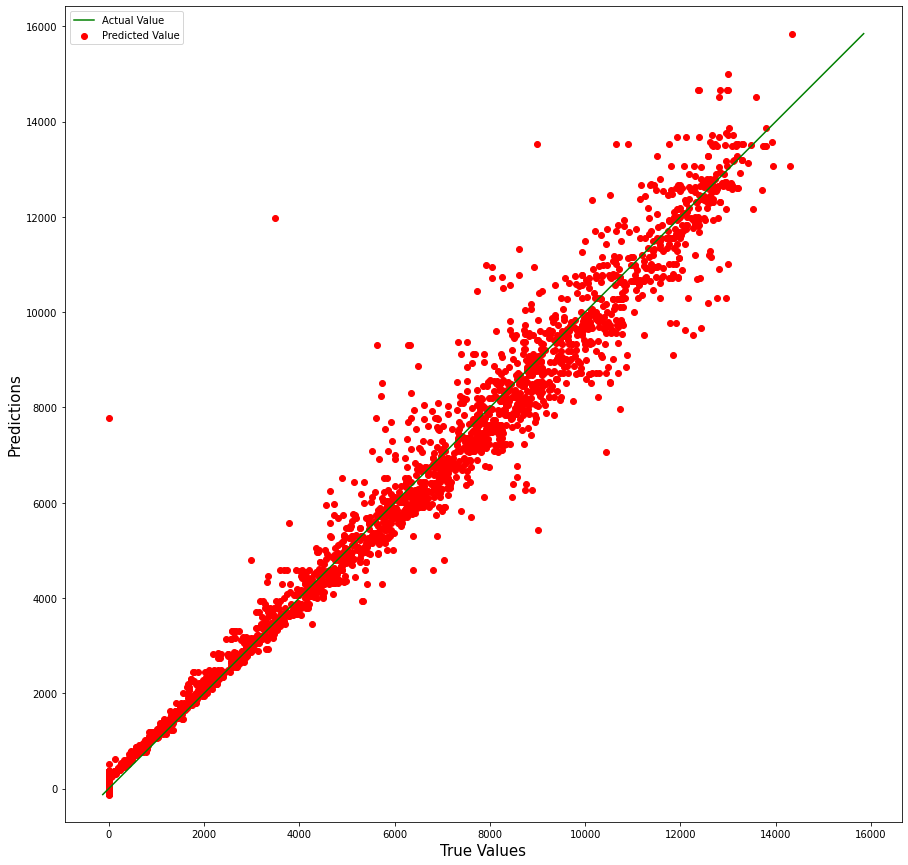

In [14]:
import matplotlib.pyplot as plt
plt.figure(figsize=(15,15))
plt.scatter(y_test, pred, c='red')

p1 = max(max(pred), max(y_test))
p2 = min(min(pred), min(y_test))
plt.plot([p1, p2], [p1, p2], 'green')
plt.xlabel('True Values', fontsize=15)
plt.ylabel('Predictions', fontsize=15)
plt.legend(['Actual Value', 'Predicted Value'])
plt.axis('equal')
plt.show()

RMSE score: 523.06526427 (SD: 43.17941388)
R2 score  : 0.98343934 (SD: 0.00278505)
MAE score : 261.70178574 (SD: 6.68519568)
MSE score : 275461.7324728 (SD: 46903.40557066)


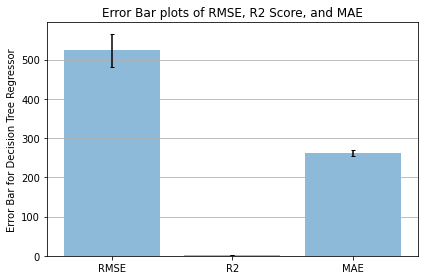

In [17]:
from numpy import absolute

scores_rmse = absolute(rmse_scores)
scores_mse = absolute(mse_scores)
scores_r2 = absolute(r2_cv_scores)
scores_mae = absolute(mae_scores)
labels = ['RMSE', 'R2', 'MAE']
x_pos = np.arange(len(labels))
CTEs = [absolute(scores_rmse.mean()), absolute(scores_r2.mean()), absolute(scores_mae.mean())]
error = [absolute(scores_rmse.std()), absolute(scores_r2.std()), absolute(scores_mae.std())]
fig, ax = plt.subplots()
ax.bar(x_pos, CTEs,
       yerr=error,
       align='center',
       alpha=0.5,
       ecolor='black',
       capsize=2)
ax.set_ylabel('Error Bar for Decision Tree Regressor')
ax.set_xticks(x_pos)
ax.set_xticklabels(labels)
ax.set_title('Error Bar plots of RMSE, R2 Score, and MAE')
ax.yaxis.grid(True)

#Print metric values
print('RMSE score: %.8f (SD: %.8f)' % (scores_rmse.mean(), scores_rmse.std()) )
print('R2 score  : %.8f (SD: %.8f)' % (scores_r2.mean(), scores_r2.std()) )
print('MAE score : %.8f (SD: %.8f)' % (scores_mae.mean(), scores_mae.std()) )
print('MSE score : %.7f (SD: %.8f)' % (scores_mse.mean(), scores_mse.std()) )

# Save the figure and show
plt.tight_layout()
plt.savefig('bar_plot_with_error_bars.png')
plt.show()